# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 4__

__Nombres de los estudiantes: Carlos Morán Alfonso y Carlos Tardón Rubio__

In [4]:
RANDOM_STATE = 42
import numpy as np
import pandas as pd

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [5]:
filename = 'countries_of_the_world.csv'
df = pd.read_csv(filename, sep=',', index_col='Country') #cargamos los datos del csv en un DataFrame, usando como índice el nombre de los países
df.head() #visualizamos el dataframe original, y vemos que hay filas con valores Nan

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [6]:
df = df.drop(['Region'],axis=1) #eliminamos la columna Region
# df = df.dropna() el enunciado pide hacer dropna aquí, pero si lo hacemos en el apartado 2, después de 
# quedarnos con el subconjunto de variables, conseguimos un mayor número de filas no nulas
df #mostramos las primeras 5 filas

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
Western Sahara,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


In [7]:
df.describe(include='all') # mostramos descriptores estadisticos del dataframe
""" Observamos que hay 179 paises(mirando el count en cualquier columna), y hay 18 variables"""

' Observamos que hay 179 paises(mirando el count en cualquier columna), y hay 18 variables'

In [8]:
df.columns # hay 18 variables

Index(['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [9]:
df = df.loc[:,['GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Agriculture',
       'Industry', 'Service']] # nos quedamos con el subconjunto de las variables que queremos
df = df.dropna() # el enunciado pide hacer dropna en el apartado 1, pero si lo hacemos aqui (después de 
# quedarnos con el subconjunto de variables) conseguimos un mayor número de filas no nulas
df

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
Country,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380
Albania,4500.0,86.5,71.2,0.232,0.188,0.579
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298
Angola,1900.0,42.0,7.8,0.096,0.658,0.246
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780
...,...,...,...,...,...,...
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381
Yemen,800.0,50.2,37.2,0.135,0.472,0.393


#### Explicacion de las columnas
1. GDP ($ per capita): producto interior bruto per capita, en dolares
2. Literacy (%): porcentaje de población que es alfabeta, que sabe leer y escribir
3. Phones (per 1000): numero de telefonos por cada 1000 habitantes
4. Agriculture: porcentaje del gdp que se debe al sector de la agricultura
5. Industry: porcentaje del gdp que se debe al sector industrial
6. Service: porcentaje del gdp que se debe al sector servicios

In [10]:
# los tres sectores agrupan el 100% del pib, asi que su suma tiene que salir alrededor de 1 
df[['Agriculture','Industry','Service']].sum(axis=1)

Country
Afghanistan     1.000
Albania         0.999
Algeria         0.999
Angola          1.000
Anguilla        1.000
                ...  
Venezuela       1.000
Vietnam         1.000
Yemen           1.000
Zambia          0.999
Zimbabwe        1.001
Length: 196, dtype: float64

In [11]:
# sin embargo, en Belize el error es de más del 9%
df[abs(df[['Agriculture','Industry','Service']].sum(axis=1) - 1) > 0.09] 

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
Country,,,,,,
Belize,4900.0,94.1,115.7,0.142,0.152,0.612


Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [12]:
df.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,9391.836735,82.285714,213.407143,0.154219,0.288597,0.556679
std,10108.571366,19.829721,208.316500,0.149170,0.139607,0.164649
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1875.000000,70.300000,29.950000,0.038000,0.199500,0.425750
50%,5250.000000,91.150000,141.500000,0.100500,0.274500,0.561500
75%,13300.000000,97.925000,337.400000,0.227750,0.350500,0.671500
max,55100.000000,100.000000,898.000000,0.769000,0.906000,0.954000


In [13]:
df[['GDP ($ per capita)']].idxmax()

GDP ($ per capita)    Luxembourg 
dtype: object

In [14]:
df.quantile(0.95,numeric_only=True) ## Percentil del 0,95. Otro dato que apunta a la acusada desigualdad entre países

GDP ($ per capita)    29650.00000
Literacy (%)             99.80000
Phones (per 1000)       590.02500
Agriculture               0.45125
Industry                  0.57000
Service                   0.79475
Name: 0.95, dtype: float64

###### Analisis distribuciones de cada variable
Lo primero que se observa es que el GDP tiene un rango de valores entre 500 y 55100(37800 si hicieramos el dropna en el apartado 1, pues eliminaríamos Luxemburgo), muy superior al resto de variables lo que nos indica que posteriormente tendremos que preprocesar los datos. Además, la media es de 9391.836 dólares, con una std de 10108.57, lo cual indica que todavía existe el problema de desigualdad en el mundo ( en españa, el. gdp per capita es de 22.000$, lo cual son 2.342 veces más que la media).  

En cuanto a literacy, es un porcentaje, así que los valores tienen un maximo de 100( así que hay países con un porcentaje de alfabetización del 100%), y minimo de 17.6, que se corresponde con algún país del tercer mundo con baja escolarización. La media es del 82.2857%, y la desviación típica de 19.83, lo cual indica que aunque un rango muy amplio de literacy, esta variable tiene menos desviación (con respecto a la media) que el resto de variables. De hecho el percentil 50 es del 91.15%, lo cual son excelentes noticias pues significa que el 50% de los países tiene una alfabetización de más del 91%.

Las tres últimas variables son porcentuales, pero están expresadas en el rango 0-1 (al contrario que literacy, que está en el rango 0-100) así que la media está siempre entre 0 y 1. Además, las desviaciones típicas de estas tres variables son muy similares(entre el 0.1396 y el 0.165), mientras que las medias son bastante distintas, predominando el sector servicios con el 55.66% del GDP.

Por último, la variable Phones tiene una media de 213.407, y una desviación de 208.316, lo cual es una alta variabilidad, pero menor a la del producto interior bruto. Al contrario que las variables Literacy, Agriculture, Industry y Service, esta está expresada sobre 1000 habitantes, así que en este dataframe convivimos con 4 escalas distintas

In [15]:
df.loc[['Spain '],:]

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
Country,,,,,,
Spain,22000.0,97.9,453.5,0.04,0.295,0.665


<AxesSubplot:ylabel='Density'>

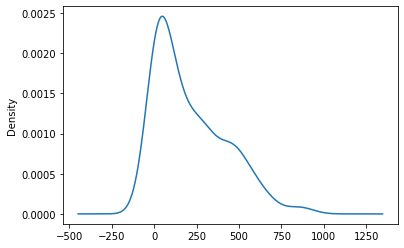

In [16]:
df['Phones (per 1000)'].plot.density()

<AxesSubplot:ylabel='Density'>

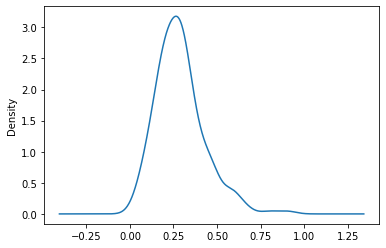

In [17]:
df['Industry'].plot.density()

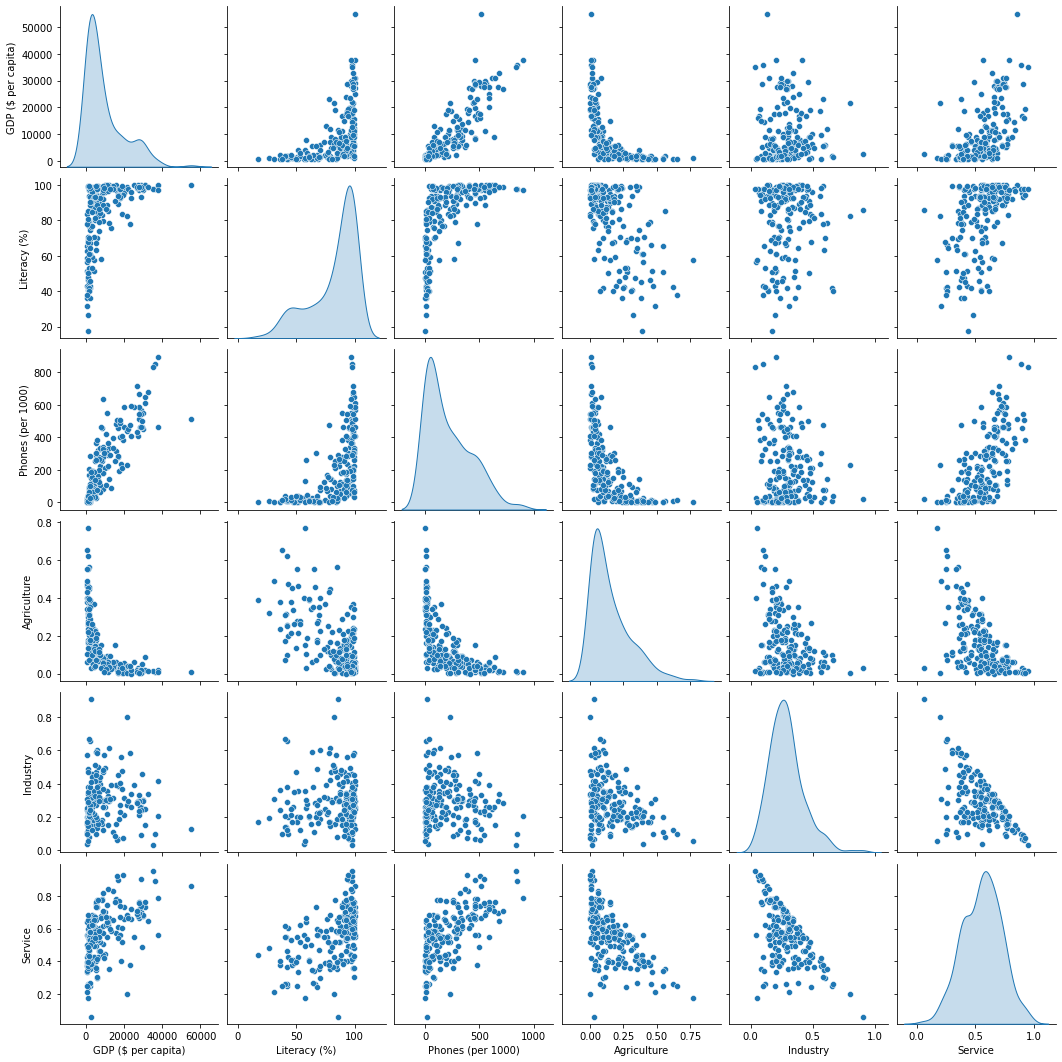

In [20]:
import seaborn as sns

sns.pairplot(df, diag_kind='kde')

In [99]:
df.corr(method='pearson')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.512422,0.859845,-0.607990,0.003426,0.548692
Literacy (%),0.512422,1.000000,0.606059,-0.615412,0.065220,0.499638
Phones (per 1000),0.859845,0.606059,1.000000,-0.639759,-0.099627,0.665395
Agriculture,-0.607990,-0.615412,-0.639759,1.000000,-0.347812,-0.609954
Industry,0.003426,0.065220,-0.099627,-0.347812,1.000000,-0.529808
Service,0.548692,0.499638,0.665395,-0.609954,-0.529808,1.000000


#### Análisis relaciones entre variables
Como vemos en el diagrama de dispersión, y en los coeficientes de correlación de Pearson, las dos variables que están más relacionadas son el GDP y los teléfonos por cada 1000 habitantes, con una correlación positiva del 0.88352. Intuitivamente es fácil de interpretar esta relación como una relación de causalidad, pues los países ricos tienen más poder adquisitivo, y por tanto podrán adquirir más productos tecnológicos.

El segundo y tercer pares de variables con mayor correlación son el sector Servicios con el número de teléfonos(con una correlación del 64.96%), y el porcentaje de literacy con el número de teléfonos, con una correlación positiva del 0.59. Al principio esta correlación puede chocar un poco, y podemos esperar que el segundo par de variables con mayor correlación fueran GDP y Literacy. Sin embargo, una posible explicación a este hecho es que es necesario tener ciertos conocimientos (leer y escribir) para usar un teléfono, y la necesidad de usar teléfonos en sociedades con un sector servicios muy desarrollado.

El cuarto y quinto pares más correlacionado es el GDP con Service, y el GDP con Literacy, con correlación positiva de 0.52. La relación entre estas ultimas variables es intuitiva, cuanto más rico sea un país, más oportunidades tiene la población de acceder a la educación, y cuanto más culta es la población, mayores riquezas puede generar. Hay que destacar que, tanto el par anterior como este tienen un diagrama de dispersión que parece se podría modelar con una regresión exponencial/logarítmica que superaría a cualquier regresión lineal en términos de error cuadrático medio. Esto es debido a la diferencia de escalas entre las variables.

En cuanto a las correlaciones negativas, observamos que Agriculture, Industry y Service están negativamente correlacionadas entre sí. Esto es obvio, pues estan expresadas como porcentaje, así que si sube una, las otras dos han de descender. Además, la Agricultura está negativamente correlacionada con GDP, Literacy y Phones, lo cual es un resultado de que en el tercer mundo predomina sobre todo la agricultura, y por tanto hay menos riqueza y menor porcentaje de alfabetización.

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [100]:
df.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,9391.836735,82.285714,213.407143,0.154219,0.288597,0.556679
std,10108.571366,19.829721,208.316500,0.149170,0.139607,0.164649
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1875.000000,70.300000,29.950000,0.038000,0.199500,0.425750
50%,5250.000000,91.150000,141.500000,0.100500,0.274500,0.561500
75%,13300.000000,97.925000,337.400000,0.227750,0.350500,0.671500
max,55100.000000,100.000000,898.000000,0.769000,0.906000,0.954000


#### Preprocesamos

Es necesario preprocesar los datos, pues mientras que el GDP tiene como rango de valores desde 500 hasta 55100 (pues está medido en dólares), otras variables como Agriculture, Industry o Service están tomadas en porcentaje.  En total, las 6 variables que tenemos están expresadas en 4 escalas distintas( $ por habitante, porcentaje entre 0-100, porcentaje 0-1, y telefonos por cada 1000 habitantes). Si no preprocesaramos, el gdp influiría muchisimo más en la distancia entre puntos, y el clustering solo dependería de esta variable.

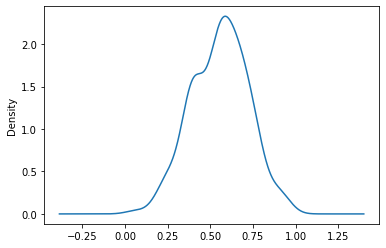

In [101]:
df['Service'].plot.density() # A grandes rasgos sigue una normal

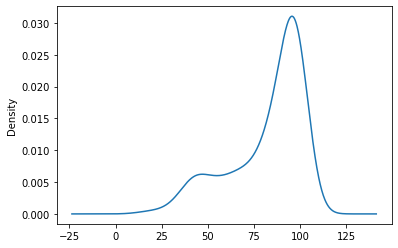

In [102]:
df['Literacy (%)'].plot.density() # La literacy tiene media alta(81%), pero es asimétrica, no sigue una normal

##### Elección método preprocesado
Como vemos en las gráficas de las distribuciones, y en el diagrama de dispersión del apartado anterior, mientras que las variables Service e Industry siguen una normal, el resto de variables son bastante asimétricas pues tienen una tail muy pronunciada, y por tanto no siguen una normal. Es por ello que el método de reescalado que hemos elegido es el minmax.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df.values) # entrenamos el scaler con el array interno del dataframe
X_scaled = scaler.transform(df.values) #creamos un nuevo array con los datos escalados

In [16]:
X_scaled

array([[0.003663  , 0.22330097, 0.0033415 , 0.49414824, 0.23798627,
        0.35650224],
       [0.07326007, 0.83616505, 0.0790822 , 0.30169051, 0.1784897 ,
        0.57959641],
       [0.1007326 , 0.63592233, 0.08676765, 0.1313394 , 0.64988558,
        0.26457399],
       ...,
       [0.00549451, 0.39563107, 0.04121185, 0.17555267, 0.50343249,
        0.37107623],
       [0.00549451, 0.76456311, 0.00891067, 0.28608583, 0.29519451,
        0.47869955],
       [0.02564103, 0.88713592, 0.02962798, 0.23276983, 0.24141876,
        0.57959641]])

In [17]:
df.values

array([[7.00e+02, 3.60e+01, 3.20e+00, 3.80e-01, 2.40e-01, 3.80e-01],
       [4.50e+03, 8.65e+01, 7.12e+01, 2.32e-01, 1.88e-01, 5.79e-01],
       [6.00e+03, 7.00e+01, 7.81e+01, 1.01e-01, 6.00e-01, 2.98e-01],
       ...,
       [8.00e+02, 5.02e+01, 3.72e+01, 1.35e-01, 4.72e-01, 3.93e-01],
       [8.00e+02, 8.06e+01, 8.20e+00, 2.20e-01, 2.90e-01, 4.89e-01],
       [1.90e+03, 9.07e+01, 2.68e+01, 1.79e-01, 2.43e-01, 5.79e-01]])

In [18]:
df

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
Country,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380
Albania,4500.0,86.5,71.2,0.232,0.188,0.579
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298
Angola,1900.0,42.0,7.8,0.096,0.658,0.246
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780
...,...,...,...,...,...,...
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381
Yemen,800.0,50.2,37.2,0.135,0.472,0.393


## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [106]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans

K_MAX = 10
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX):  #Rango 2..10
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE) # Usaremos kmeans con random_state para
                                                                        # que los resultados sean reproducibles
    km.fit(X_scaled)
    
    score[k-2] = -1 * km.score(X_scaled)
    davies_boulding[k-2] = davies_bouldin_score(X_scaled, km.labels_)
    silhouette[k-2] = silhouette_score(X_scaled, km.labels_)

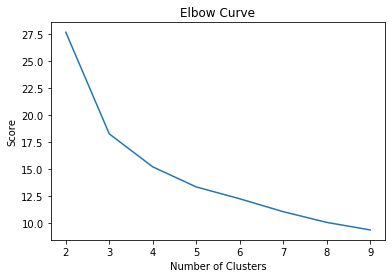

In [107]:
# diagrama del codo. El codo está en K=3 pero es poco evidente
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

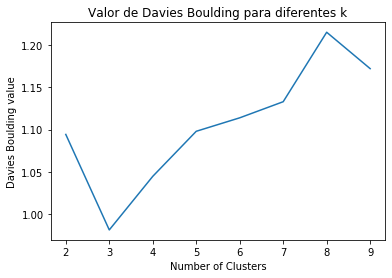

In [108]:
# davies boulding. El más pequeño es k=3
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

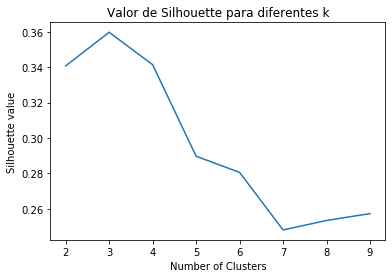

In [109]:
# silhouette. El mayor es K=3
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

#### Tamaño optimo de clusters
En este caso, el diagrama del codo es dificil de interpretar, pues el codo está en K=3 pero es poco evidente. Sin embargo, tanto Davies Boulding como Silhouette nos confirman que el tamaño óptimo de clusters ese K=3.

In [110]:
k = 3

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [111]:
km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE) 
km.fit(X_scaled) # Entrenamos kmeans con el K del apartado anterior

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [112]:
km.labels_ # Estas son los clusters de cada pais

array([0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 1, 2, 1,
       2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1,
       1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 1, 1, 0,
       0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2,
       0, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2],
      dtype=int32)

In [113]:
df["clusters"] = km.labels_ # Añadimos la columna de clusters a nuestro dataframe
df

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,clusters
Country,,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380,0
Albania,4500.0,86.5,71.2,0.232,0.188,0.579,2
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298,2
Angola,1900.0,42.0,7.8,0.096,0.658,0.246,0
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780,1
...,...,...,...,...,...,...,...
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541,2
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381,2
Yemen,800.0,50.2,37.2,0.135,0.472,0.393,0


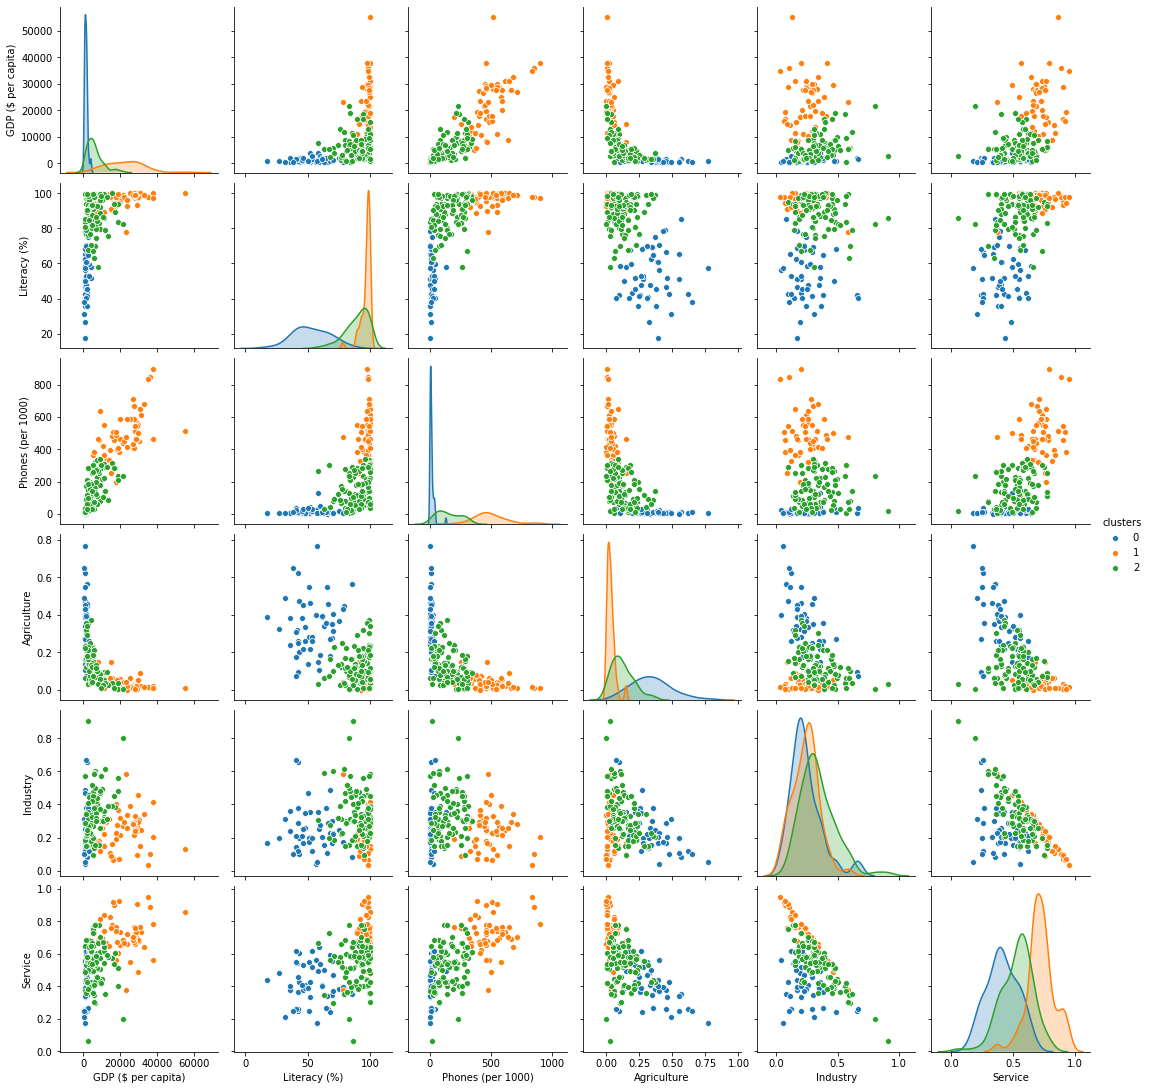

In [114]:
# Imprimimos el diagrama de dispersion usando colores diferentes para cada cluster
sns.pairplot(df, diag_kind='kde', hue='clusters')

Como podemos observar, los clusters que mejor se separan son el azul y el naranja. Esto se observa, sobre todo, en las distribuciones de las variables GDP, Literacy,Phones y Agriculture. Además, se pone especialmente de manifiesto en los diagramas de dispersión de los pares GDP,Phones(el cluster 0 no se ve porque lo tapa el 2)  GDP,Literacy   Literacy,Phones  Phones,Agriculture y GDP,Agriculture.

Sin embargo, la variable industry no consigue separar tan bien los datos, pues como vemos en las funciones de distribución (fila y columna Industry), las medias y varianzas son muy similares. Además, los clusters verde y naranja no se separan muy bien en los pares Literacy,Agriculture   Agriculture,Industry y Agriculture,Service. Por último, los clusters verde y azul no se separan muy bien en los pares GDP,Industry  GDP,Service   Phones,Industry y Phones Service. Por tanto, el cluster verde ( el 2) es el cluster intermedio, y en la siguiente celda se pone de manifiesto claramente que el 2 son los países que están entre el primer(cluster 1) y el tercer mundo(cluster 0) 

In [115]:
df.groupby(["clusters"]).describe().transpose() # Mostramos los descriptores estadísticos

clusters                            0             1             2
GDP ($ per capita) count    49.000000     54.000000     93.000000
                   mean   1451.020408  22255.555556   6106.451613
                   std     795.592664   9813.442199   4376.314870
                   min     500.000000   5000.000000    700.000000
                   25%     800.000000  15175.000000   2900.000000
                   50%    1300.000000  22600.000000   5000.000000
                   75%    1800.000000  28750.000000   7600.000000
                   max    4000.000000  55100.000000  21500.000000
Literacy (%)       count    49.000000     54.000000     93.000000
                   mean     53.014286     96.705556     89.335484
                   std      14.425542      3.927043      9.346676
                   min      17.600000     77.900000     58.000000
                   25%      42.200000     95.725000     84.000000
                   50%      51.600000     98.000000     92.300000
                   75%      64.600000     99.000000     97.100000
                   max      85.300000    100.000000     99.900000
Phones (per 1000)  count    49.000000     54.000000     93.000000
                   mean     15.148980    496.579630    153.443011
                   std      20.487223    138.403538     95.342380
                   min       0.200000    194.500000      3.700000
                   25%       3.600000    407.425000     74.700000
                   50%       9.300000    463.200000    137.900000
                   75%      16.300000    562.175000    232.000000
                   max     131.800000    898.000000    340.700000
Agriculture        count    49.000000     54.000000     93.000000
                   mean      0.341776      0.035037      0.124602
                   std       0.149210      0.030610      0.083953
                   min       0.073000      0.000000      0.002000
                   25%       0.250000      0.015500      0.061000
                   50%       0.335000      0.029000      0.112000
                   75%       0.432000      0.042250      0.172000
                   max       0.769000      0.150000      0.370000
Industry           count    49.000000     54.000000     93.000000
                   mean      0.242041      0.241870      0.340258
                   std       0.131800      0.108023      0.142797
                   min       0.040000      0.032000      0.096000
                   25%       0.170000      0.172500      0.243000
                   50%       0.209000      0.252000      0.312000
                   75%       0.290000      0.295750      0.419000
                   max       0.666000      0.585000      0.906000
Service            count    49.000000     54.000000     93.000000
                   mean      0.416306      0.722889      0.534129
                   std       0.120682      0.108831      0.125753
                   min       0.177000      0.375000      0.062000
                   25%       0.350000      0.667750      0.439000
                   50%       0.401000      0.724000      0.550000
                   75%       0.520000      0.768250      0.614000
                   max       0.643000      0.954000      0.778000

Como vemos claramente en los descriptores estadísticos, el cluster 0 se corresponde con los países del tercer mundo: de media, solo tienen un GDP de 1451, un índice de alfabetización del 53%, tan solo 15 teléfonos por cada 1000 habitantes, un sector agricultor moderadamente alto, y un sector servicios de tan solo el 41%. En el otro extremo tenemos al cluster 1, que se corresponde con los países más desarrollados, con un muy alto GDP (de media 22255.56 $ per capita), alta alfabetización (96%), abundantes teléfonos, un sector agricultor casi inexistente, y un sector servicios muy desarrollado. Por último, el cluster 2 se corresponde con los países que están entre medias de ser un país pobre y de ser un país rico, es decir, los países en vías de desarrollo